<a href="https://colab.research.google.com/github/OluchukwuO/RNN_TimeSeries/blob/master/RNN_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

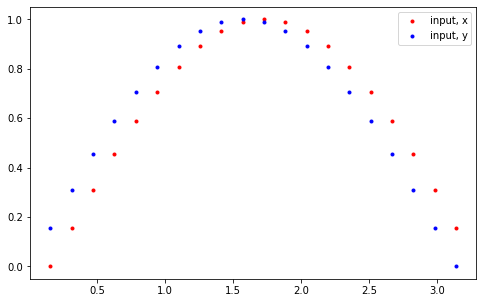

In [0]:
plt.figure(figsize = (8,5))

seq_length = 20

time_steps = np.linspace(0, np.pi, seq_length + 1)
# print(time_steps)
data = np.sin(time_steps)
# print(data)
data.resize((seq_length+1, 1))
# print(data)

x = data[:-1]
y = data[1:]

plt.plot(time_steps[1:], x, 'r.', label = 'input, x')
plt.plot(time_steps[1:], y, 'b.', label = 'input, y')

plt.legend(loc = 'best')
plt.show()

In [0]:
class RNN(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers):

    super(RNN, self).__init__()


    self.hidden_dim=hidden_dim

    self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first = True)
    self.fc = nn.Linear(hidden_dim, output_size)

  def forward(self, x, hidden):
    batch_size = x.size(0)

    r_out, hidden = self.rnn(x, hidden)
    r_out = r_out.view(-1, self.hidden_dim)

    output = self.fc(r_out)

    return output, hidden

In [0]:
# test that dimensions are as expected
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
# print(data)
data.resize((seq_length, 1))
# print(data)

test_input = torch.Tensor(data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())

# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 20, 1])
Output size:  torch.Size([20, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [0]:
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 2

rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr = 0.01)

In [0]:
def train(rnn, n_steps, print_every):

  hidden = None

  for batch_i, step in enumerate(range(n_steps)):
    time_steps = no.linspace(step)
